In [1]:
"""
Problem Decomposition
--------------------------------------------------------------
1. Data Preparation and Understanding**:
   - Load the FIFA 22 and 21 player datasets.
   - Handle missing values and preprocess the data.

2. Feature Extraction and Selection:
   - Extract relevant player features from the FIFA 22 and 21 datasets.
   - Select features with the highest correlation to the player's overall rating.

3. Model Selection and Training:
   - Choose three suitable regression models.
   - Train models using cross-validation techniques on the FIFA 22 dataset.

4. Performance Evaluation and Optimization:
   - Evaluate models using metrics like MAE and MSE on the FIFA 22 dataset.
   - Optimize model performance through hyperparameter tuning.

5. Testing on Previous Season Data:
   - Since FIFA 23 data is not available, you can simulate testing on new data by using the FIFA 21 dataset.
   - Test models on the FIFA 21 dataset to assess generalization performance.

6. Model Deployment:
   - Deploy the best-performing model on a web page.
   - Allow user input for new player data and display predictions with confidence scores.

7. Submission:
   - Create a well-documented GitHub repository with required files and instructions. Clearly mention the limitation of not having FIFA 23 data for direct testing.
"""

"\nProblem Decomposition\n--------------------------------------------------------------\n1. Data Preparation and Understanding**:\n   - Load the FIFA 22 and 21 player datasets.\n   - Handle missing values and preprocess the data.\n\n2. Feature Extraction and Selection:\n   - Extract relevant player features from the FIFA 22 and 21 datasets.\n   - Select features with the highest correlation to the player's overall rating.\n\n3. Model Selection and Training:\n   - Choose three suitable regression models.\n   - Train models using cross-validation techniques on the FIFA 22 dataset.\n\n4. Performance Evaluation and Optimization:\n   - Evaluate models using metrics like MAE and MSE on the FIFA 22 dataset.\n   - Optimize model performance through hyperparameter tuning.\n\n5. Testing on Previous Season Data:\n   - Since FIFA 23 data is not available, you can simulate testing on new data by using the FIFA 21 dataset.\n   - Test models on the FIFA 21 dataset to assess generalization performanc

In [19]:
####1. Data Preparation & Feature Extraction

##Importing Librairies 

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# For saving models
import joblib

# For the web application
from flask import Flask, request, jsonify


In [20]:
# Load the FIFA 22 and 21 player datasets with low_memory=False
fifa22_df = pd.read_csv('C:\\Users\\yenma\\Downloads\\players_22.csv', low_memory=False)
fifa21_df = pd.read_csv('C:\\Users\\yenma\\Downloads\\players_21.csv', low_memory=False)

In [21]:
# Display the first few rows of the dataset (not important but I want a fair idea of what i am dealing with)
print(fifa22_df.head())
print(fifa21_df.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  .

In [22]:
##Exploratory Data Analysis (EDA)



C:\Users\yenma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


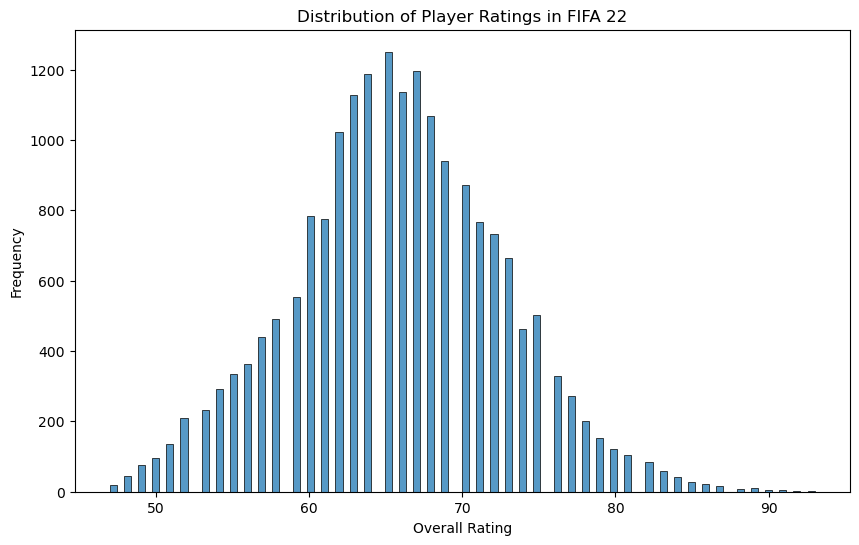

In [23]:
# Visualize the distribution of player ratings in FIFA 22
plt.figure(figsize=(10, 6))
sns.histplot(data=fifa22_df, x='overall', bins=100)
plt.title('Distribution of Player Ratings in FIFA 22')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


C:\Users\yenma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


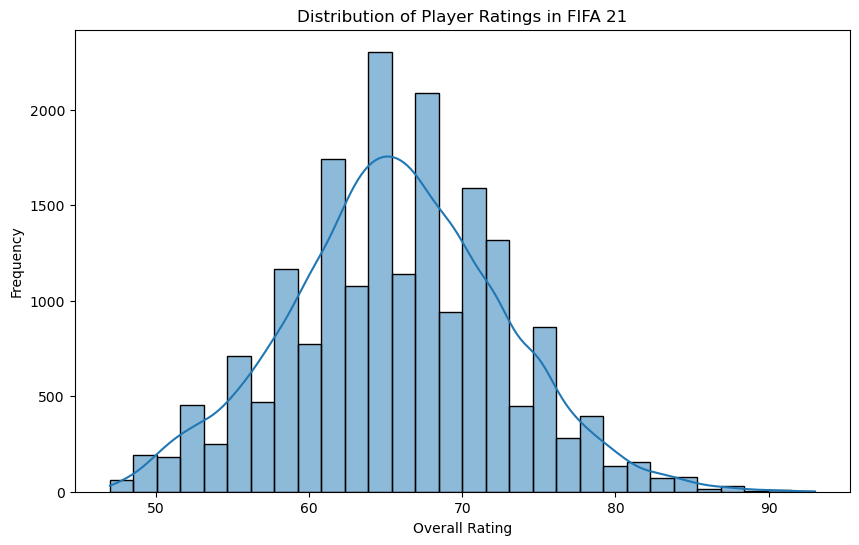

In [24]:

# Visualize the distribution of player ratings in FIFA 21
plt.figure(figsize=(10, 6))
sns.histplot(data=fifa21_df, x='overall', bins=30, kde=True)
plt.title('Distribution of Player Ratings in FIFA 21')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Select relevant player features
relevant_features = [
    'sofifa_id', 'long_name', 'player_positions', 'overall', 'potential', 'age', 
    'height_cm', 'weight_kg', 'club_name', 'league_name', 'nationality_name', 
    'preferred_foot', 'weak_foot', 'skill_moves', 'shooting', 'passing', 
    'dribbling', 'defending', 'physic'
]

fifa22_df = fifa22_df[relevant_features]
fifa21_df = fifa21_df[relevant_features]


In [26]:
####2. Feature Correlation Analysis


In [27]:
# Identify numeric and categorical columns
numeric_features = ['potential', 'age', 'height_cm', 'weight_kg',  'skill_moves', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
categorical_features = ['club_name', 'league_name', 'nationality_name','weak_foot', 'preferred_foot', 'player_positions']

# Calculate correlation matrix and select highly correlated features
correlation_matrix = fifa21_df[numeric_features + ['overall']].corr()
print(correlation_matrix['overall'].sort_values(ascending=False))


overall        1.000000
passing        0.711521
dribbling      0.641097
potential      0.636366
physic         0.530386
shooting       0.488315
age            0.468197
skill_moves    0.381369
defending      0.358524
weight_kg      0.146242
height_cm      0.031579
Name: overall, dtype: float64


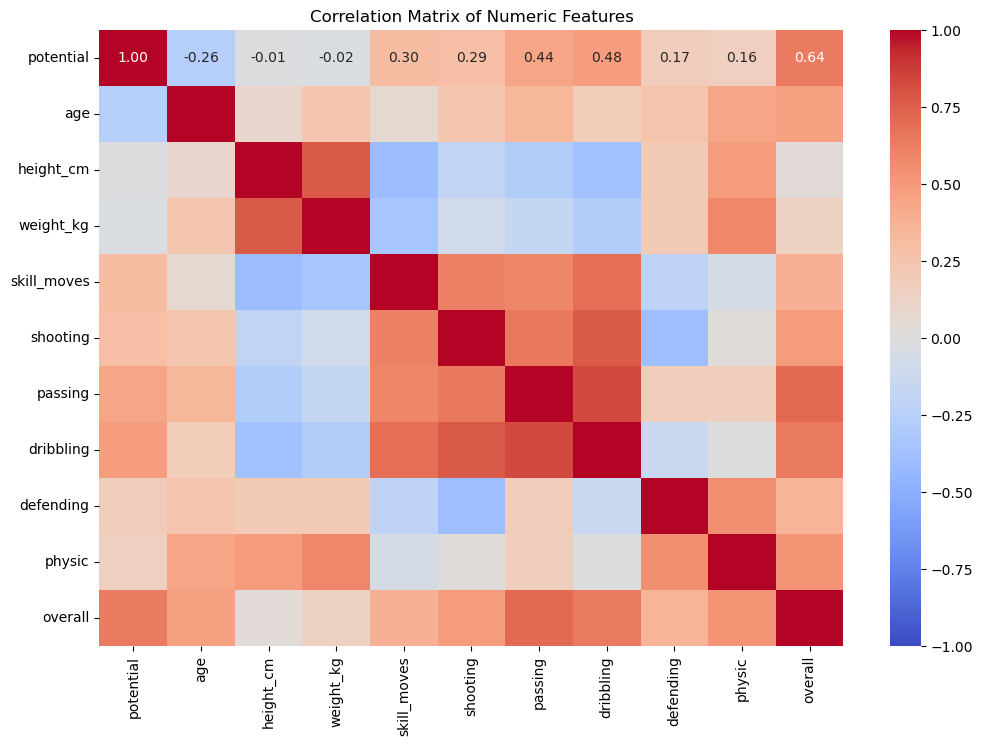

In [28]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [29]:
####3. Model Training with Cross-Validation

In [30]:
# Define preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



In [31]:
# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [32]:
##Data Preparation

X_train = fifa21_df.drop(columns=['sofifa_id', 'long_name', 'overall'])
y_train = fifa21_df['overall']
X_test = fifa22_df.drop(columns=['sofifa_id', 'long_name', 'overall'])
y_test = fifa22_df['overall']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(f"Number of samples in FIFA 22 dataset after preprocessing: {len(X_train)}")
print(f"Number of samples in FIFA 21 dataset after preprocessing: {len(X_test)}")


Number of samples in FIFA 22 dataset after preprocessing: 18944
Number of samples in FIFA 21 dataset after preprocessing: 19239


In [33]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}



In [34]:
# Nested cross-validation example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [35]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)



In [36]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='neg_mean_absolute_error')


In [ ]:
nested_cv_results = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='neg_mean_absolute_error')
print(f"Nested CV MAE for Random Forest: {nested_cv_results.mean():.2f} +/- {nested_cv_results.std():.2f}")



In [ ]:
# Evaluate the best model on the test set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [ ]:
# Evaluate the best model on the test set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_



In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Test R^2: {r2_score(y_test, y_pred):.2f}")

In [ ]:
####4. Model Performance Evaluation and Fine-Tuning

In [ ]:
# Define a function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2


In [ ]:
# Define a function to fine-tune the model
def fine_tune_model(model, X_train, y_train, X_test, y_test):
    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')

    # Fit the model using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    mae, mse, r2 = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    print(f"Best Model: {best_model.__class__.__name__}")
    print(f"MAE: {mae:.2f} +/- {best_model.score(X_test, y_test):.2f}")
    print(f"MSE: {mse:.2f} +/- {best_model.score(X_test, y_test)


In [ ]:
####5. Testing on Previous Season Data

In [ ]:
# Evaluate on FIFA 21 dataset
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE on FIFA 21: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE on FIFA 21: {mean_squared_error(y_test, y_pred)}")


In [ ]:
####Model Deployment on a Web Page

##Saving Models

import joblib

# Save best model and preprocessors
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(models, 'models.pkl')
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(numeric_transformer, 'numeric_transformer.pkl')
joblib.dump(categorical_transformer, 'categorical_transformer.pkl')


In [ ]:
##Creating a Web Page with Flask

from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get player data from the request
    data = request.get_json()
    player_data = data['player_data']

    # Preprocess the player data
    preprocessed_data = preprocessor.transform(np.array(player_data).reshape(1, -1))

    # Make predictions using the best model
    prediction = best_model.predict(preprocessed_data)

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
